

---


# Exploratory Data Analysis
~ Nida Attaraut


---





---


# Background tasks

The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants me to perform some exploratory data analysis.

The data that was sent over includes:

1.Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
2.Historical pricing data: variable and fixed pricing data etc
3.Churn indicator: whether each customer has churned or not

## Task
### Sub-Task 1:
Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

### Sub-Task 2:
Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.

### Sub-Task 3:
Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? You should spend 10-15 minutes on this.

For your final deliverable, please submit your analysis (in the form of a jupyter notebook, code script or PDF) as well as your half-page summary document.

Note: Use the 2 datasets within the additional resources for this task and if you’re unsure on where to start with visualizing data, use the accompanying links. Be sure to also use the data description document to understand what the columns represent. The task description document outlines the higher-level motivation of the project. Finally, use the eda_starter.ipynb file to get started with some helper functions and methods.

1.Import packages

2.Loading Datasets and Understanding the Data

3.Descriptive statistics

4.Data visualization

5.Hypothesis investigation


---






###  1.Importing python libraries

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

### 2.Loading Datasets and Understanding the Data


In [ ]:
client_ds = pd.read_csv('client_data.csv')
price_ds = pd.read_csv("price_data.csv")

In [ ]:
client_ds.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [ ]:
price_ds.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [ ]:
print('Client Data: \n')
client_ds.info(verbose = False)
print('\n--------------------------\n')
print('Price Data: \n')
price_ds.info(verbose = False)

Client Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Columns: 26 entries, id to churn
dtypes: float64(11), int64(7), object(8)
memory usage: 2.9+ MB

--------------------------

Price Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88413 entries, 0 to 88412
Columns: 8 entries, id to price_mid_peak_fix
dtypes: float64(6), object(2)
memory usage: 5.4+ MB


In [ ]:
# Changing the datatype of date column from string into datetime

for c in client_ds.columns:
    if 'date' in c:
        client_ds[c] = pd.to_datetime(client_ds[c],format='%Y-%m-%d')

for c in price_ds.columns:
     if 'date' in c:
        price_ds[c] = pd.to_datetime(price_ds[c],format = '%Y-%m-%d')

In [ ]:
print('Client Data: \n')
client_ds.info(verbose = False)
print('\n--------------------------\n')
print('Price Data: \n')
price_ds.info(verbose = False)

Client Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Columns: 26 entries, id to churn
dtypes: datetime64[ns](4), float64(11), int64(7), object(4)
memory usage: 2.9+ MB

--------------------------

Price Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88413 entries, 0 to 88412
Columns: 8 entries, id to price_mid_peak_fix
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 5.4+ MB


In [ ]:
client_ds.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [ ]:
price_ds.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    1
price_peak_fix        1
price_mid_peak_fix    1
dtype: int64

###3. Descriptive Statistics

In [ ]:
client_ds.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [ ]:
client_ds.describe(include = ['object'])

,id,channel_sales,has_gas,origin_up
count,14606,14606,14606,14606
unique,14606,8,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,11955,7097


In [ ]:
client_ds.describe(include =['datetime'])

<ipython-input-12-6a1c81232e04>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  client_ds.describe(include =['datetime'])
<ipython-input-12-6a1c81232e04>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  client_ds.describe(include =['datetime'])
<ipython-input-12-6a1c81232e04>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  client_ds.describe(include =['datetime'])
<ipython-input-12-6a1c

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
unique,1796,368,2129,386
top,2009-08-01 00:00:00,2016-02-01 00:00:00,2015-11-01 00:00:00,2015-06-23 00:00:00
freq,95,145,721,587
first,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
last,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


In [ ]:
price_ds.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,88413.000000,88413.000000,88413.000000,88412.000000,88412.000000,88412.000000
mean,0.140955,0.053942,0.030592,43.372143,10.657628,6.421242
std,0.024635,0.050034,0.036332,5.324528,12.858103,7.772565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085390,0.000000,44.266930,0.000000,0.000000
75%,0.151399,0.101673,0.072612,44.444710,24.339581,16.226389
max,0.280700,0.181480,0.114102,59.444710,36.490692,17.458221


In [ ]:
price_ds.describe(include= ['object'])

,id
count,88413
unique,7374
top,038af19179925da21a25619c5a24b745
freq,12


In [ ]:
price_ds.describe(include= ['datetime'])

<ipython-input-15-962a5a6712ad>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  price_ds.describe(include= ['datetime'])


,price_date
count,88413
unique,12
top,2015-08-01 00:00:00
freq,7373
first,2015-01-01 00:00:00
last,2015-12-01 00:00:00


### 4.Data Visualistion


In [ ]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

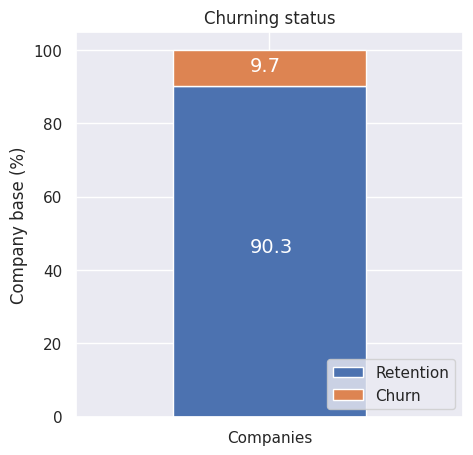

In [ ]:
churn = client_ds[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

**Inference:**

---


 **Nearly 10% of clients have churned**


---



## Sales Channel

In [ ]:
channel = client_ds[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)


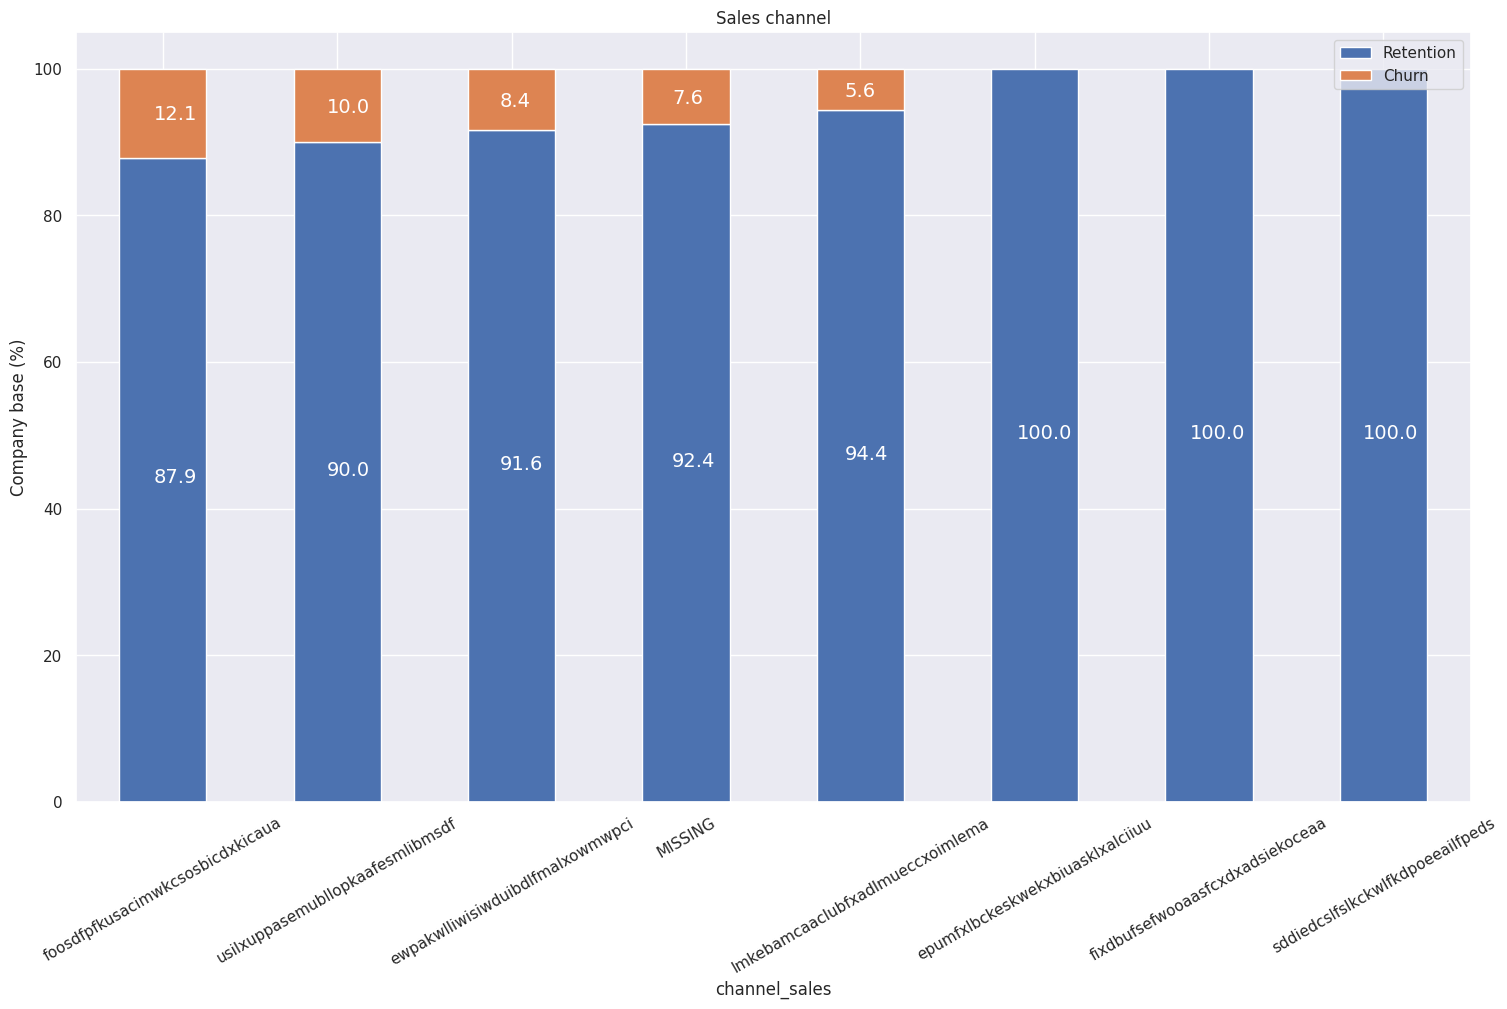

In [ ]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)


**Inference:**


---


**The churning customers are distributed
over 5 different channel sales values, including a missing value category with a churn rate of 7.6%. This missing value category could be an important feature to consider when building our predictive model.**


---




# Contract Type

In [ ]:
contract_type = client_ds[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'],contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

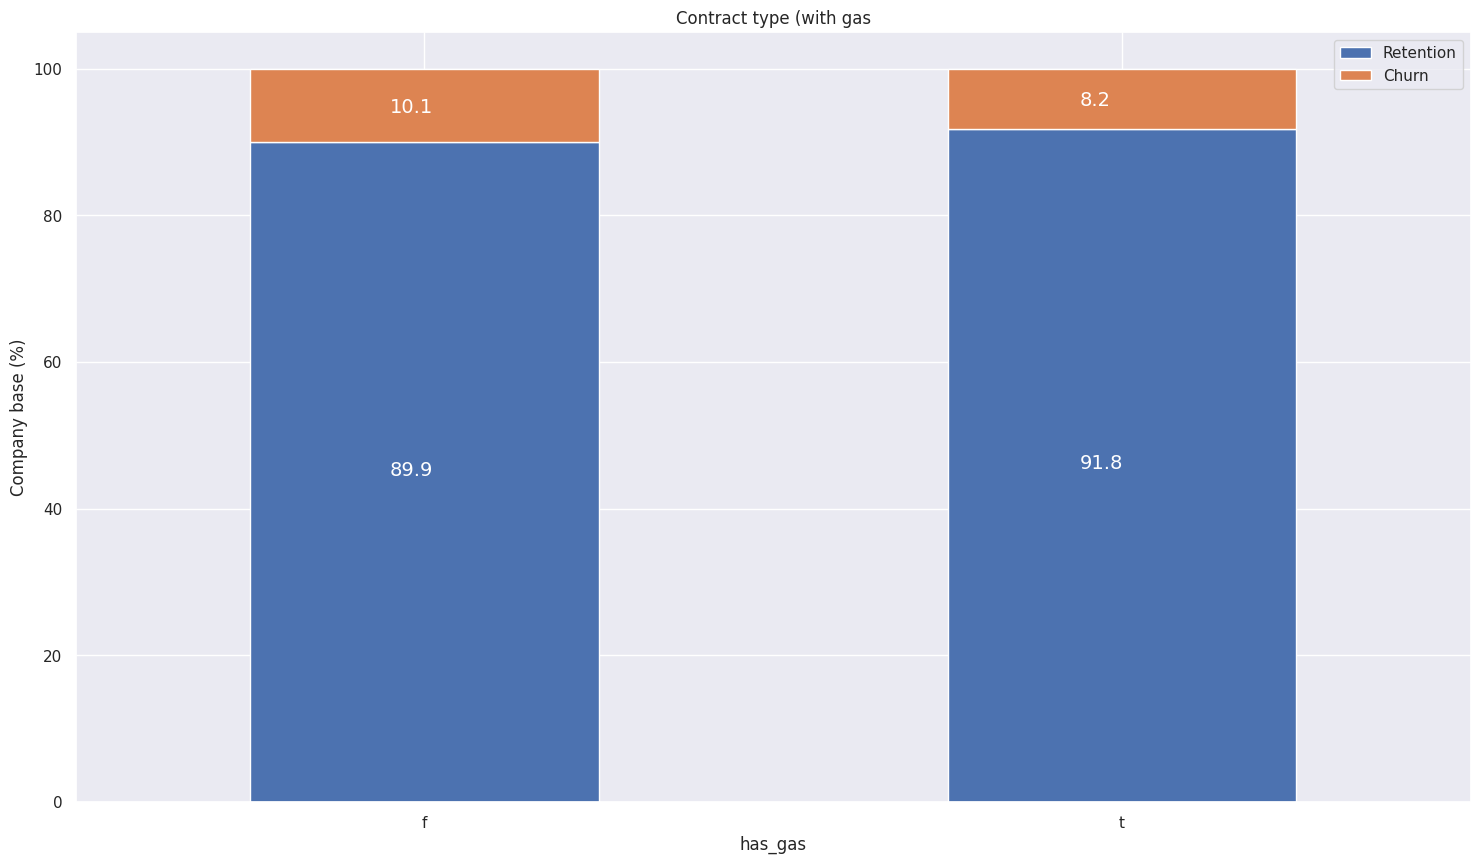

In [ ]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')


<Axes: xlabel='count', ylabel='has_gas'>

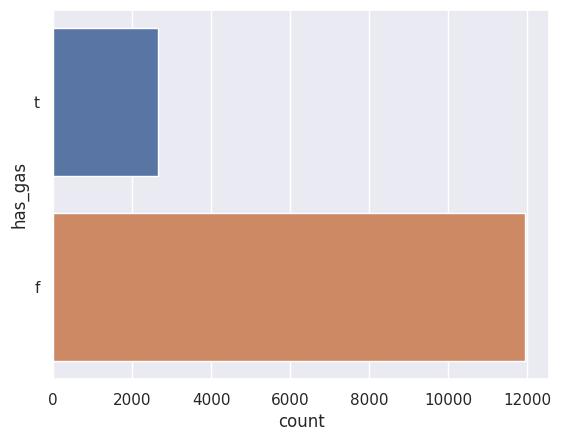

In [ ]:
sns.countplot(data=client_ds, y='has_gas')


**Inference:**

---
**1.Approximately 20% of customers have a gas supply contract.**

**2.There is no significant difference in churn rate between customers with and without a gas supply contract.**


---







# Consumption


In [ ]:
consumption = client_ds[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month','imp_cons', 'has_gas', 'churn']]


Text(0, 0.5, 'Frequency')

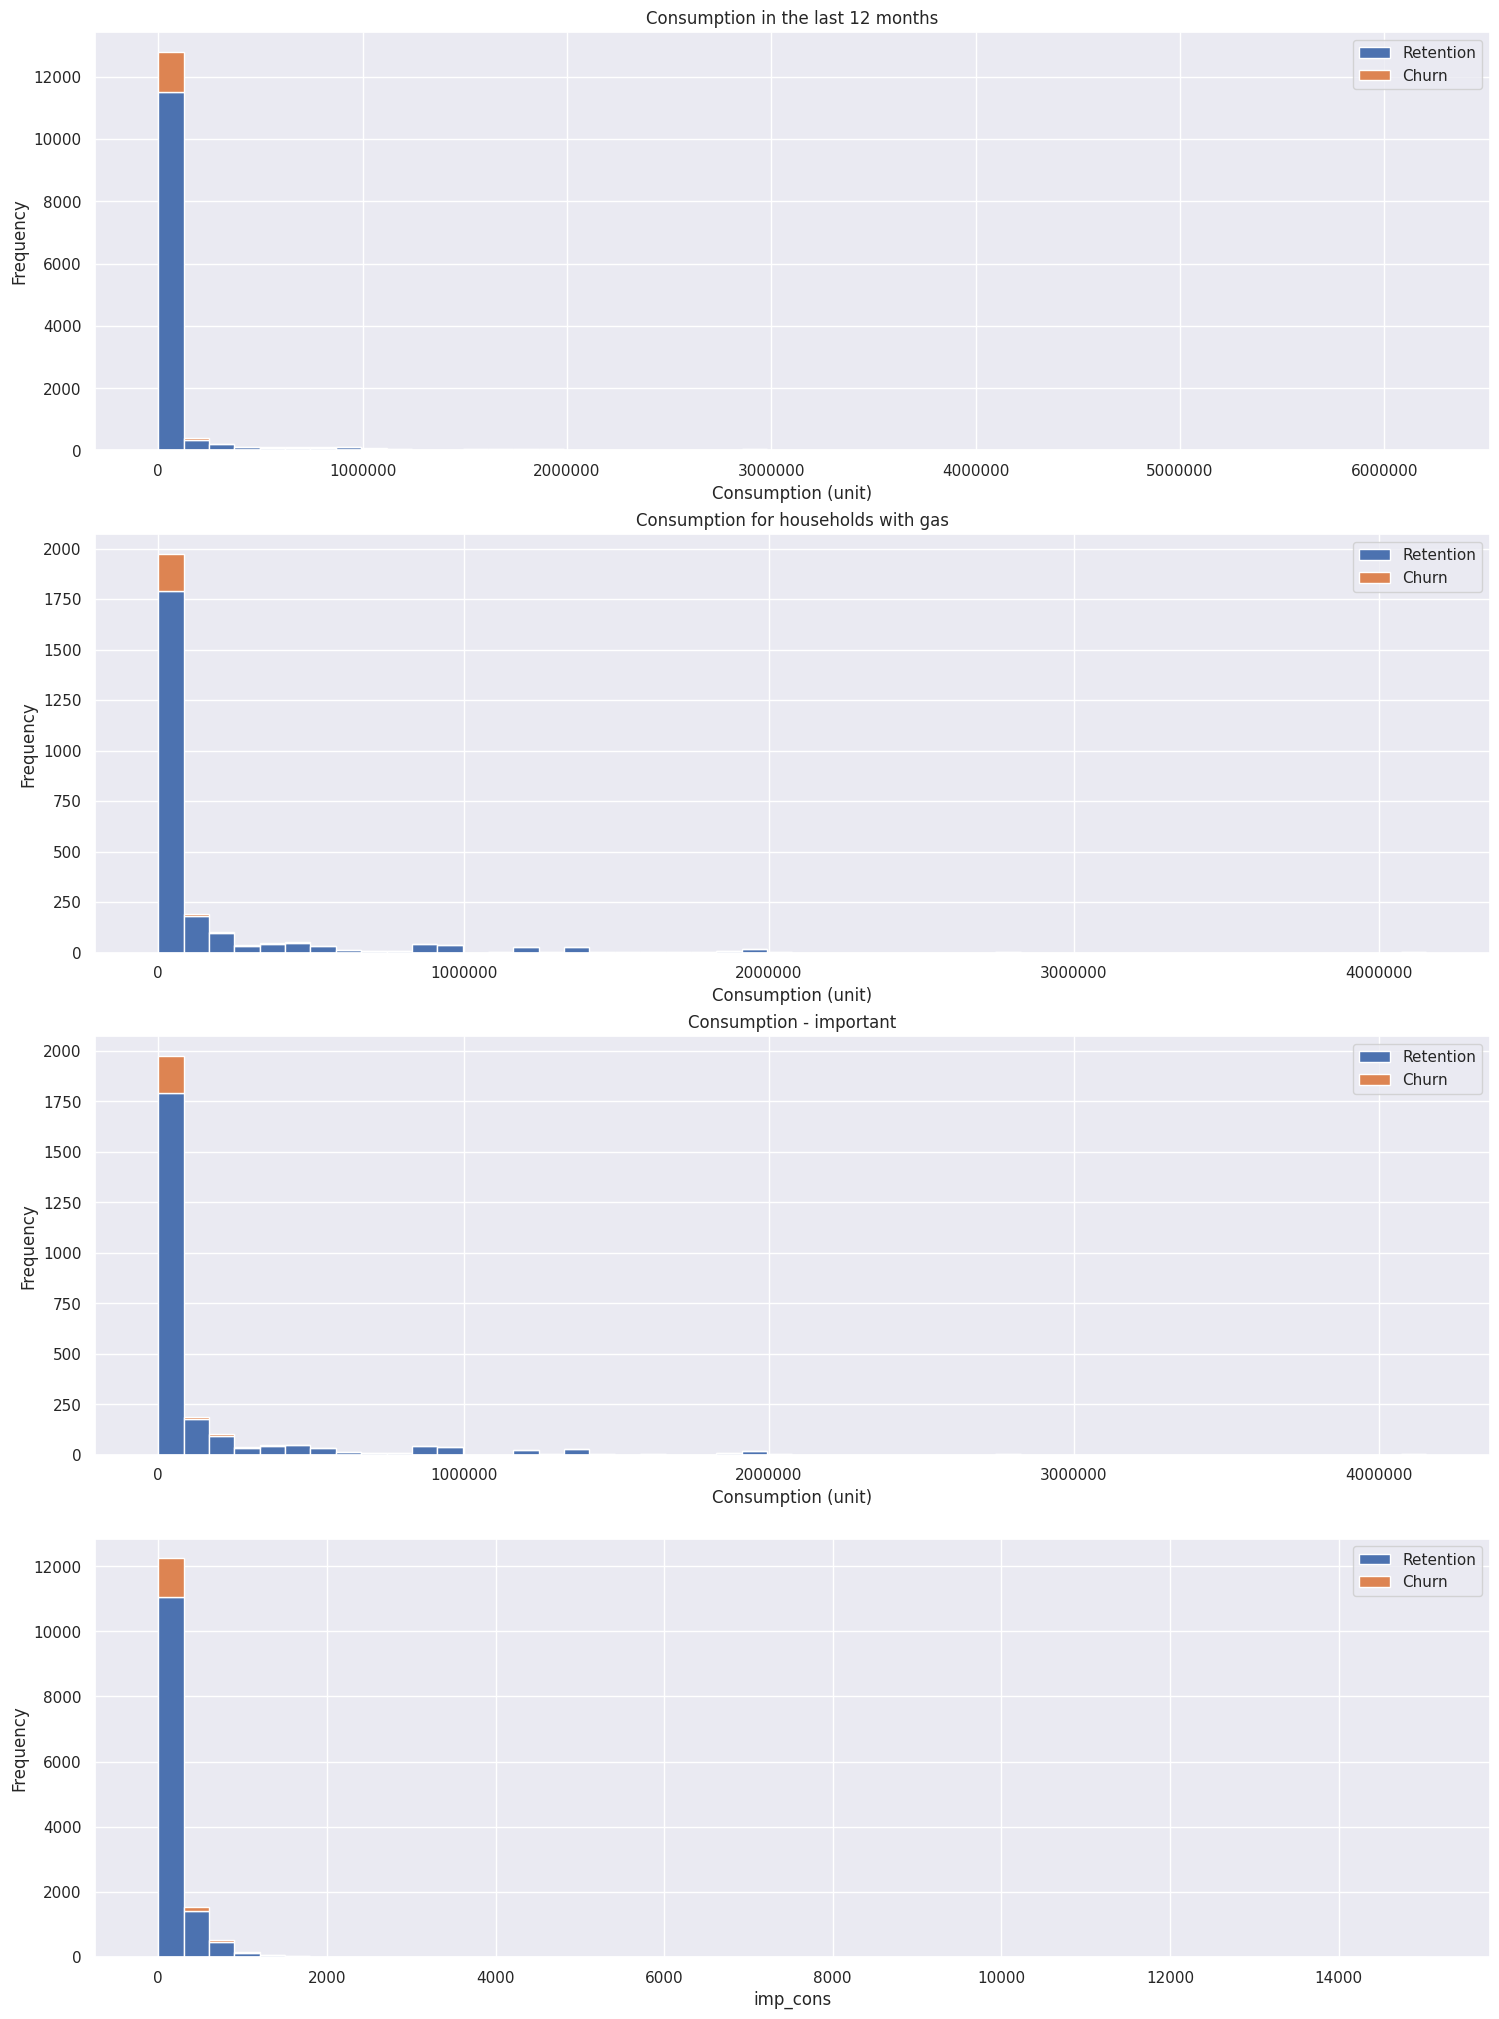

In [ ]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))#, wspace=0.3)

# Subplot 1: consumption in the last 12 months
plot_distribution(consumption, 'cons_12m', axs[0])
axs[0].set_title('Consumption in the last 12 months')
axs[0].set_xlabel('Consumption (unit)')
axs[0].set_ylabel('Frequency')

# Subplot 2: consumption for households with gas
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m',axs[1])
axs[1].set_title('Consumption for households with gas')
axs[1].set_xlabel('Consumption (unit)')
axs[1].set_ylabel('Frequency')

# Subplot 3: consumption in the last month
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m',axs[2])
axs[2].set_title('Consumption in the last month')
axs[2].set_xlabel('Consumption (unit)')
axs[2].set_ylabel('Frequency')

# Subplot 3: consumption in the last month
plot_distribution(consumption, 'imp_cons', axs[3])
axs[2].set_title('Consumption - important')
axs[2].set_xlabel('Consumption (unit)')
axs[2].set_ylabel('Frequency')



**Inference :**

---


**1. The consumption data exhibits extreme positive skewedness, with a very long right-tail towards the higher values of the distribution.**

**2. The values on the higher and lower end of the distribution are likely to be outliers.**


---


---






**Boxplot - A standard plot to visualise
the outliers and the 5 point summary :**


---


    
    1.Minimum
    
    2.First quartile (Q1)
    
    3.Median
    
    4.Third quartile (Q3)
    
    5.Maximum


---







In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# Plot horizontal boxplots using the x parameter
sns.boxplot(x=consumption["cons_12m"], ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])

# Set x-axis limit
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)

# Set y-axis labels
axs[0].set_ylabel("Cons_12m")
axs[1].set_ylabel("Cons_Gas_12m")
axs[2].set_ylabel("Cons_Last_Month")
axs[3].set_ylabel("Imp_Cons")

plt.show()


#Forecast

In [ ]:
forecast = client_ds[['id','forecast_cons_12m','forecast_cons_year', 'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']]


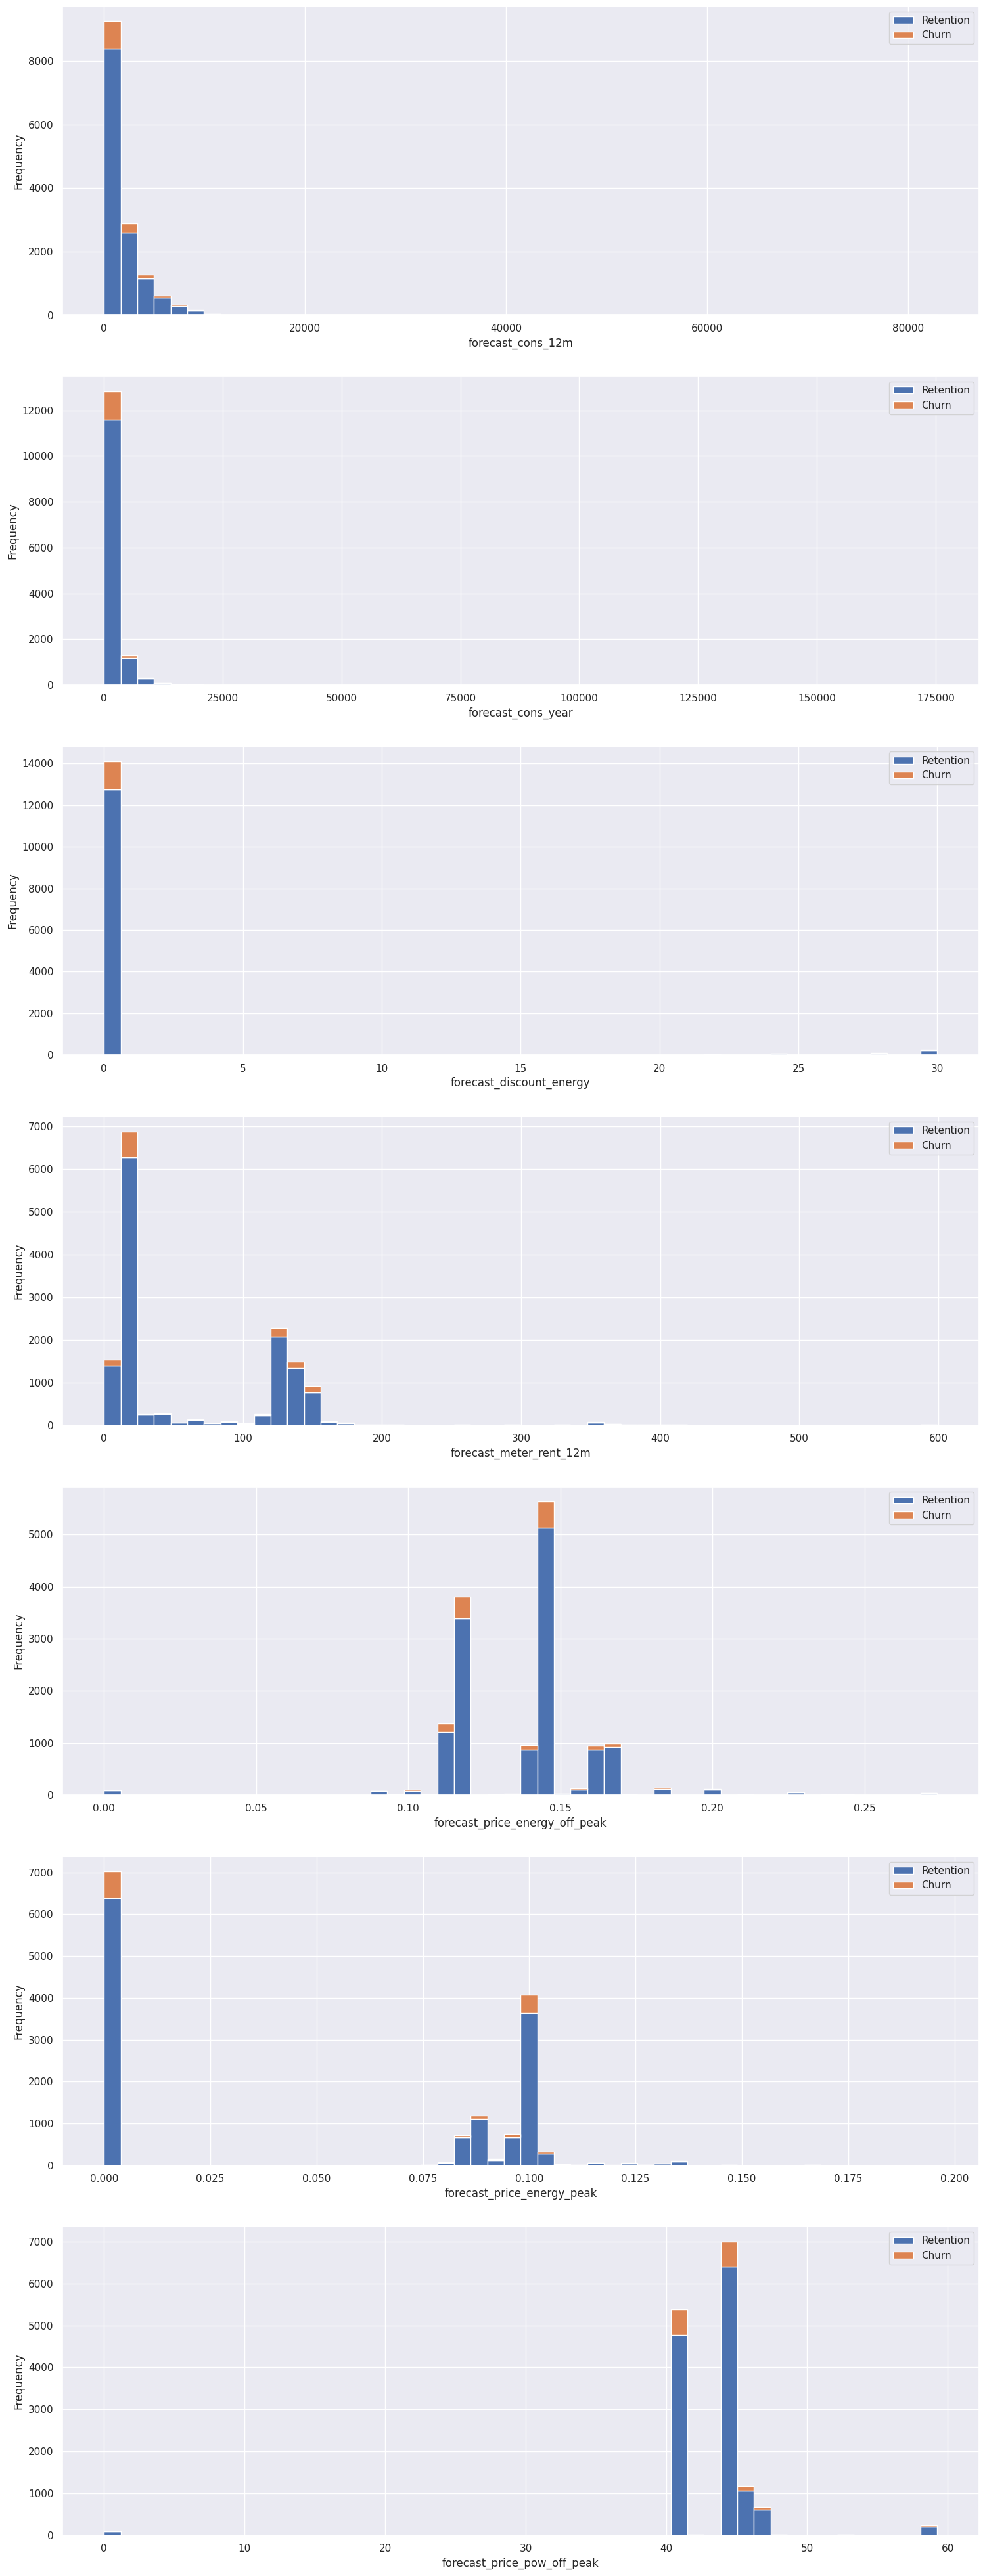

In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histogram
plot_distribution(client_ds, "forecast_cons_12m", axs[0])
plot_distribution(client_ds, "forecast_cons_year", axs[1])
plot_distribution(client_ds, "forecast_discount_energy", axs[2])
plot_distribution(client_ds, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_ds, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_ds, "forecast_price_energy_peak", axs[5])
plot_distribution(client_ds, "forecast_price_pow_off_peak", axs[6])


**Inference:**


---


 **The variables are creating a very long tail for higher values indicating high positive skewness**


---



# Margins

In [ ]:
margin = client_ds[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin']]


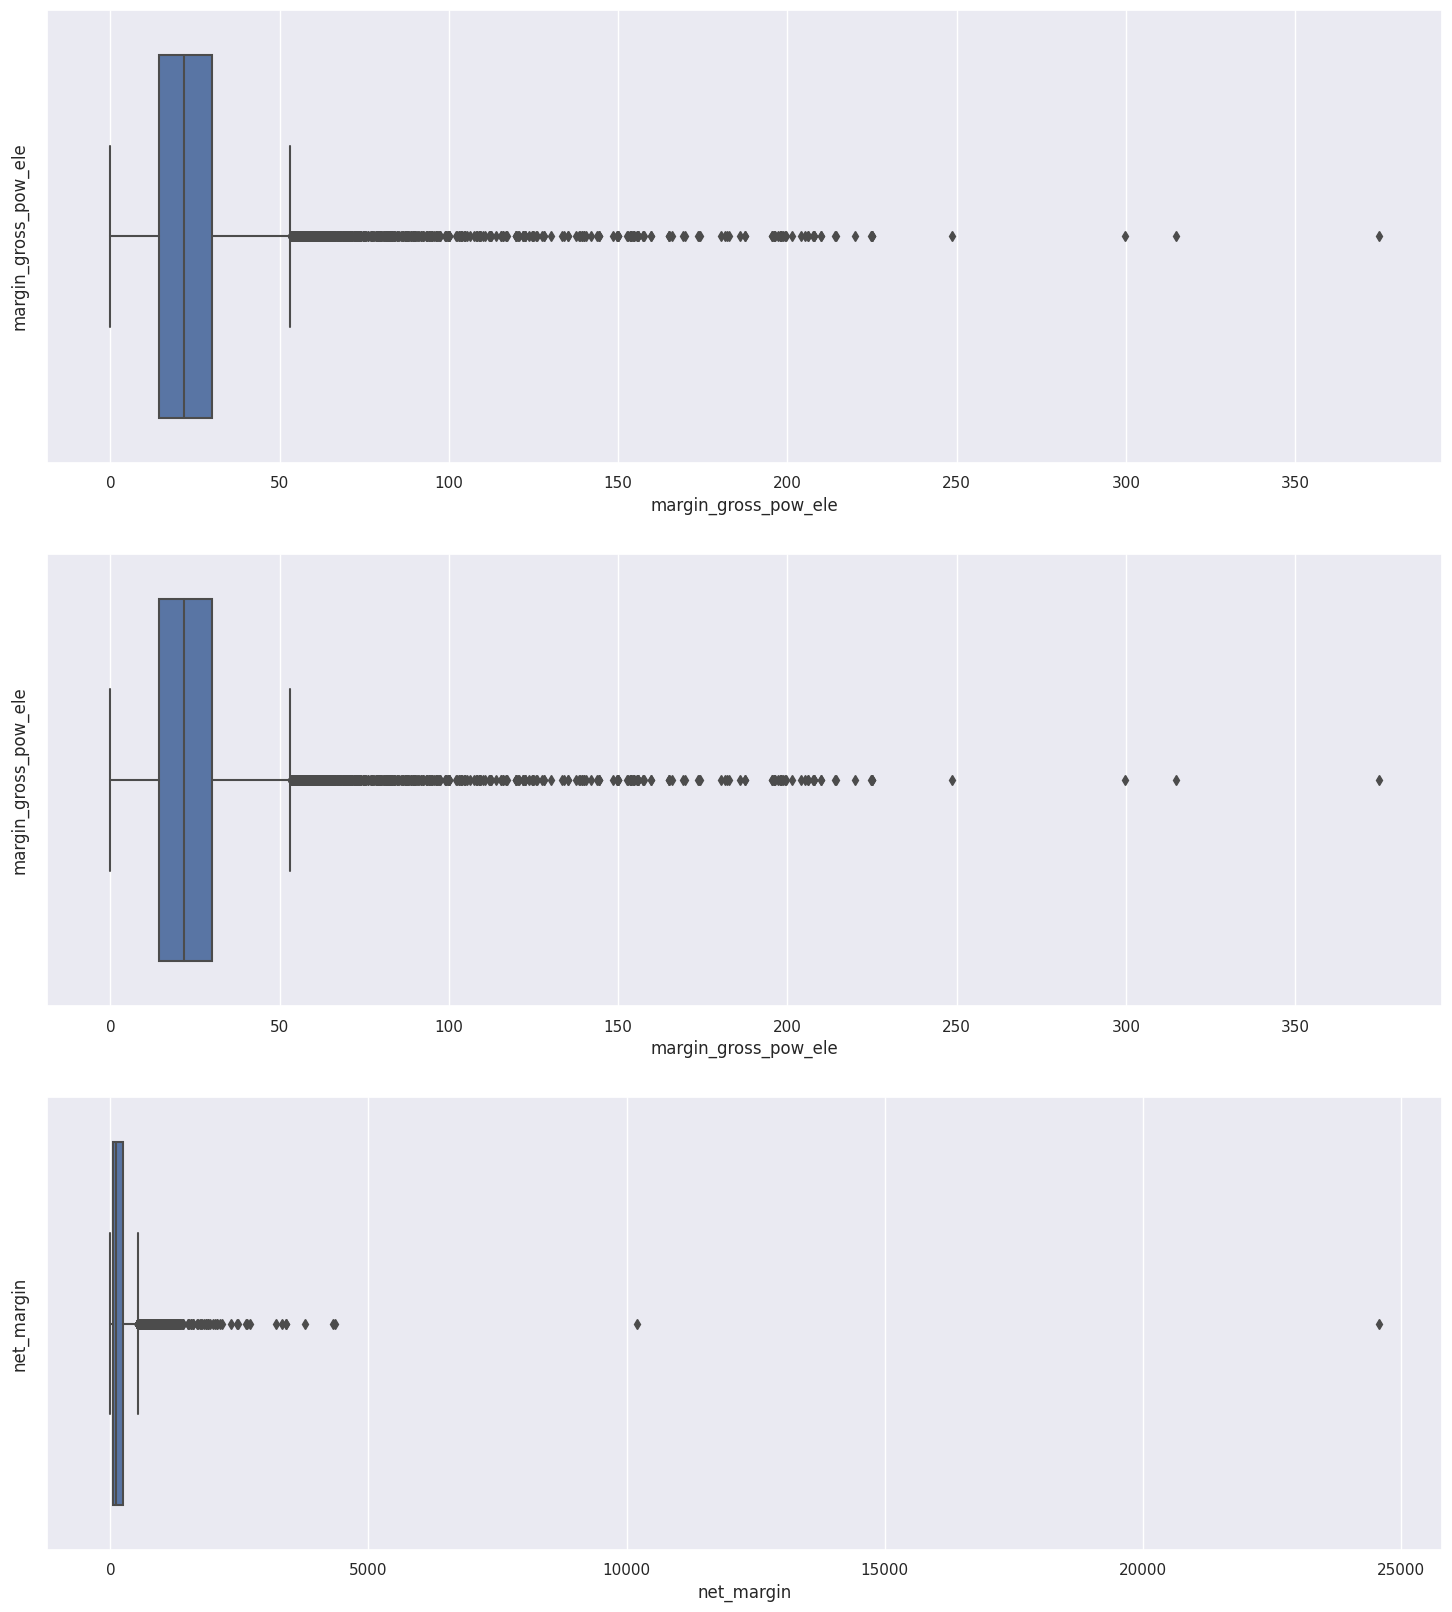

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(x=margin["margin_gross_pow_ele"],ax=axs[1])
sns.boxplot(x=margin["net_margin"], ax=axs[2])

# Set y-axis labels
axs[0].set_ylabel("margin_gross_pow_ele")
axs[1].set_ylabel("margin_gross_pow_ele")
axs[2].set_ylabel("net_margin")

plt.show()

 **Inference:**


---


  **Multiple outliers are present**


---



# Subscribed Power

In [ ]:
power = client_ds[['id','pow_max','churn']]

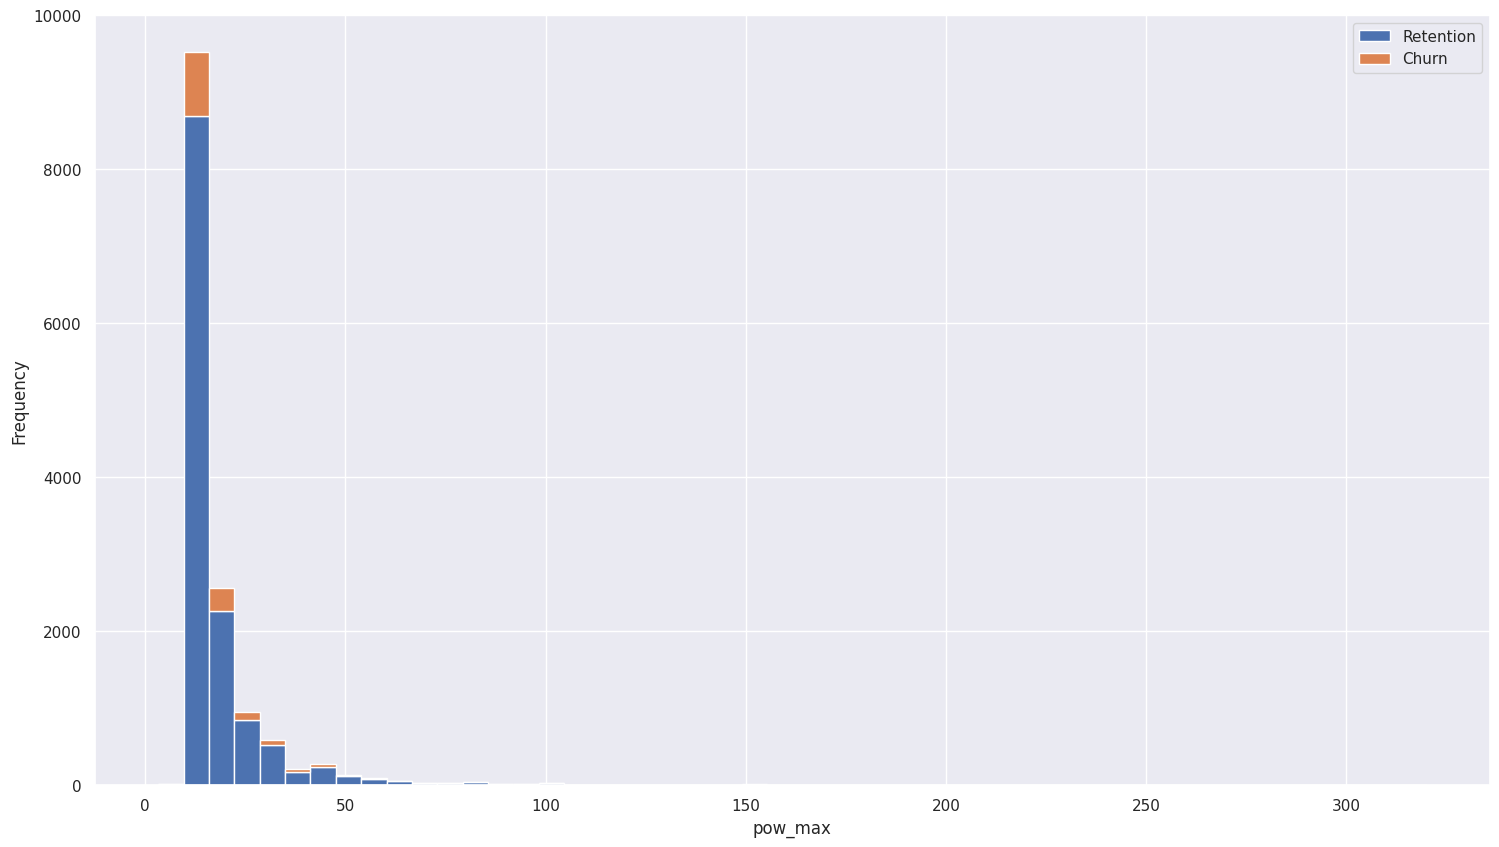

In [ ]:
fig,axs = plt.subplots(nrows = 1, figsize = (18,10))
plot_distribution(power,'pow_max',axs)

# Price Data

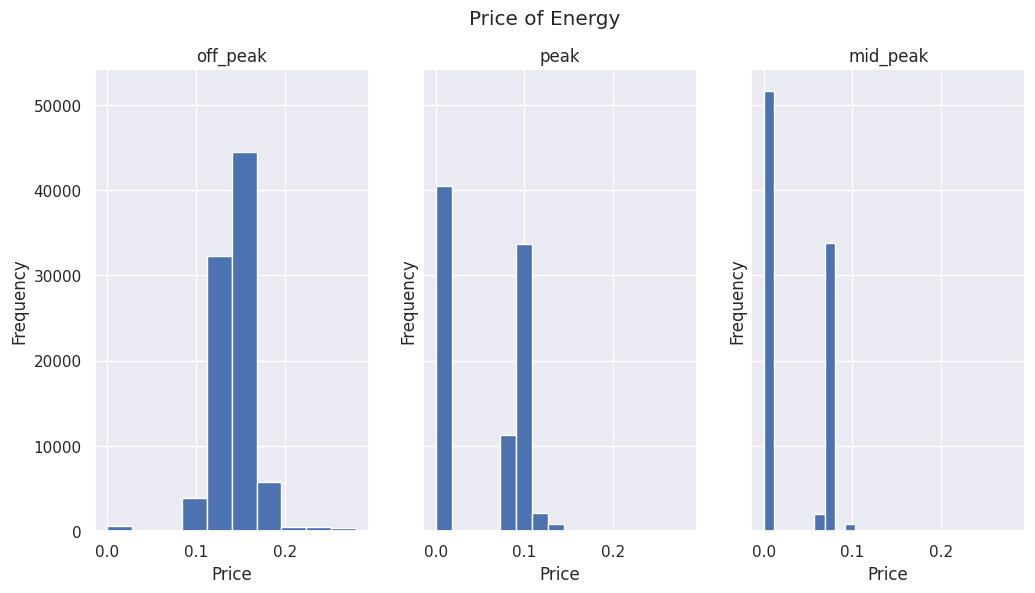

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(12, 6),sharey=True , sharex=True)
# Plot the histograms on the subplots
axs[0].hist(price_ds["price_off_peak_var"])
axs[1].hist(price_ds["price_peak_var"])
axs[2].hist(price_ds["price_mid_peak_var"])

# Set titles and labels for each subplot
axs[0].set_title('off_peak')
axs[1].set_title('peak')
axs[2].set_title('mid_peak')

axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Price')
axs[2].set_ylabel('Frequency')
axs[2].set_xlabel('Price')

fig.suptitle('Price of Energy')

# Display the plot
plt.show()


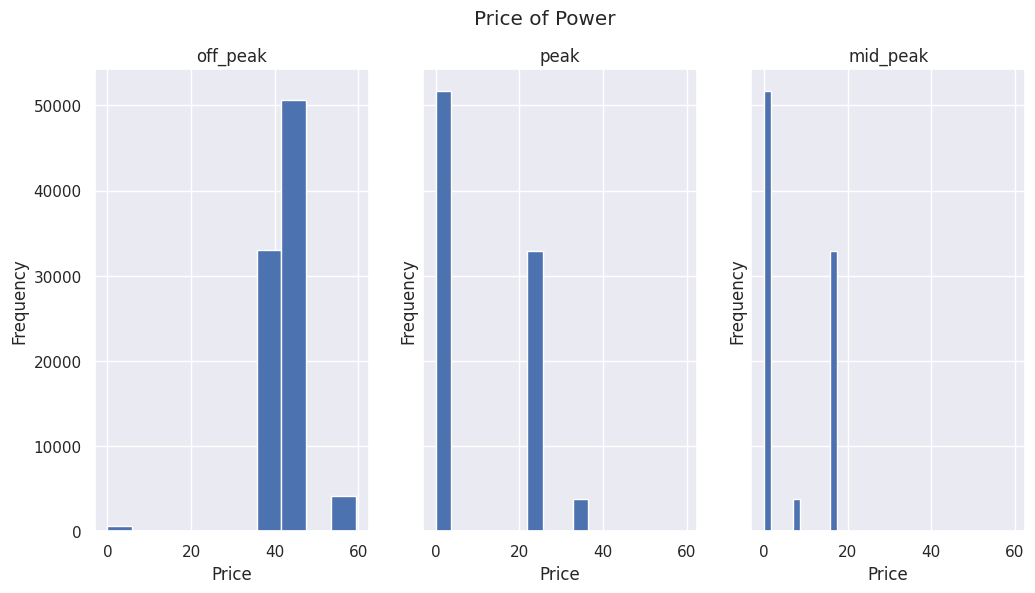

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(12, 6),sharey=True , sharex=True)
# Plot the histograms on the subplots
axs[0].hist(price_ds["price_off_peak_fix"])
axs[1].hist(price_ds["price_peak_fix"])
axs[2].hist(price_ds["price_mid_peak_fix"])

# Set titles and labels for each subplot
axs[0].set_title('off_peak')
axs[1].set_title('peak')
axs[2].set_title('mid_peak')

axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Price')
axs[2].set_ylabel('Frequency')
axs[2].set_xlabel('Price')

fig.suptitle('Price of Power')

# Display the plot
plt.show()


# Hypothesis Investigation
Now that we have explored the data, it's time to investigate whether price sensitivity has some influence on churn. First we need to define exactly what is price sensitivity.

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year & the last 6 months




In [ ]:
# Create yearly sensitivity features
mean_year = price_ds.groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()
# Create last 6 months sensitivity features
mean_6m = price_ds[price_ds['price_date'] > '2015-06-01'].groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()




In [ ]:
# Comnbine into single dataframe
mean_year = mean_year.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

mean_6m = mean_6m.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)
mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.000000,0.0,0.0,0.000011,0.000003,4.860000e-10
1,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158,0.000011,0.000003,4.860000e-10,0.000000,0.0,0.0,0.000011,0.000003,4.860000e-10
2,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000003,0.000000,0.000000e+00
3,001cd16732dc7d5bdf46b0d49996c271,0.000601,0.000000,0.000000e+00,1.230844e+00,0.000000,0.000000,1.231445,0.000000,0.000000,0.000370,0.000000,0.000000e+00,0.666667,0.0,0.0,0.667037,0.000000,0.000000e+00
4,001dc71143f45cb58aaccc2e94823c5a,0.000004,0.000000,0.000000e+00,8.619647e-03,0.000000,0.000000,0.008624,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000003,0.000000,0.000000e+00


Merging churn data to see whether price sensitivity has any correlation with churn

In [ ]:
price_analysis = pd.merge(price_features, client_ds[['id', 'churn']], on='id')
price_analysis.head()


,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.000000,0.0,0.0,0.000011,0.000003,4.860000e-10,0
1,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000003,0.000000,0.000000e+00,0
2,001cd16732dc7d5bdf46b0d49996c271,0.000601,0.000000,0.000000,1.230844e+00,0.000000,0.000000,1.231445,0.000000,0.000000,0.000370,0.000000,0.000000e+00,0.666667,0.0,0.0,0.667037,0.000000,0.000000e+00,0
3,001dc71143f45cb58aaccc2e94823c5a,0.000004,0.000000,0.000000,8.619647e-03,0.000000,0.000000,0.008624,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000003,0.000000,0.000000e+00,0
4,002b3009d069858b471918402fb237b7,0.000009,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000009,0.000003,0.000000,0.000006,0.000002,0.000000e+00,0.000000,0.0,0.0,0.000006,0.000002,0.000000e+00,0


<ipython-input-63-d29b9e8fd34d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_analysis.corr()


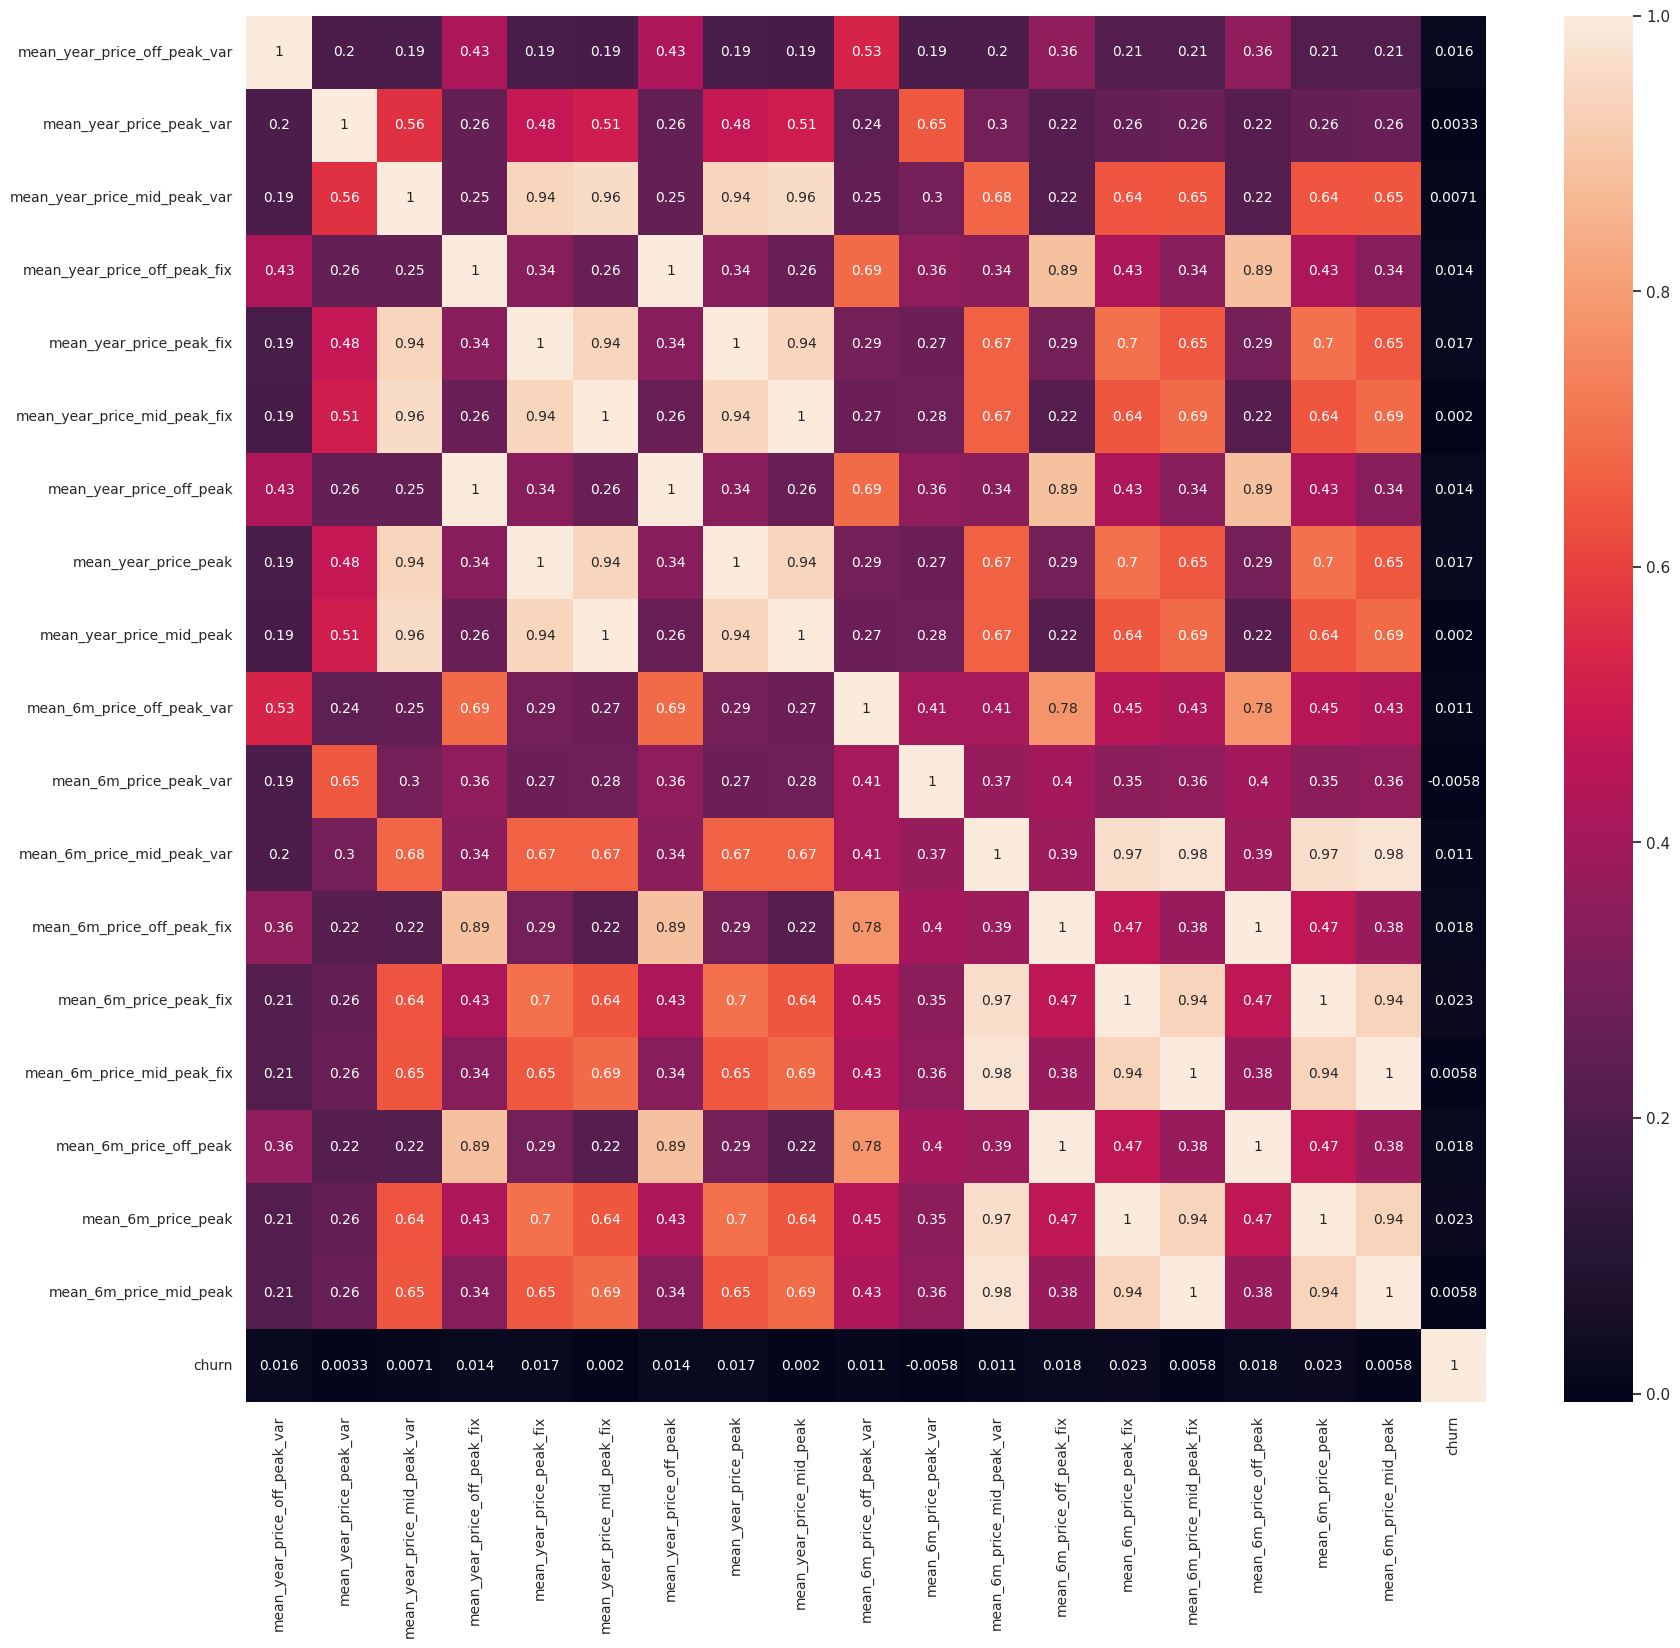

In [ ]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Inferences:**


---


**From the correlation plot, it shows a higher magnitude of correlation between other price sensitivity variables, however overall the correlation with churn is very low. This indicates that there is a weak linear relationship between price sensitity and churn. This suggests that for price sensivity to be a major driver for predicting churn, we may need to engineer the feature differently.**


---









In [ ]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis,on='id')


In [ ]:
merged_data.to_csv('clean_data_after_eda.csv')
